In [1]:
import json

# Load JSON file
with open('algoparams_from_ui1.json', 'r') as f:
    data = json.load(f)

# Now you can access the data as a Python dictionary
print(data)


{'session_name': 'test', 'session_description': 'test', 'design_state_data': {'session_info': {'project_id': '1', 'experiment_id': 'kkkk-11', 'dataset': 'iris_modified.csv', 'session_name': 'test', 'session_description': 'test'}, 'target': {'prediction_type': 'Classification', 'target': 'species', 'type': 'classifiation', 'partitioning': True}, 'train': {'policy': 'Split the dataset', 'time_variable': 'sepal_length', 'sampling_method': 'No sampling(whole data)', 'split': 'Randomly', 'k_fold': False, 'train_ratio': 0.8, 'random_seed': 10}, 'feature_handling': {'sepal_length': {'feature_name': 'sepal_length', 'is_selected': True, 'feature_variable_type': 'numerical', 'feature_details': {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'}}, 'sepal_width': {'feature_name': 'sepal_width', 'is_selected': True, 'feature_variable_type': 'numerical', 'feature_details'

In [2]:
for key, value in data.items():
    print(f"Key: {key}, Type: {type(value)}")





Key: session_name, Type: <class 'str'>
Key: session_description, Type: <class 'str'>
Key: design_state_data, Type: <class 'dict'>


In [3]:
print(data.keys())


dict_keys(['session_name', 'session_description', 'design_state_data'])


In [4]:
design_state_data = data['design_state_data']
print(design_state_data.keys())  # View the keys of the design state data


dict_keys(['session_info', 'target', 'train', 'feature_handling', 'algorithms'])


In [5]:
import pandas as pd
# Load dataset
dataset_path = data['design_state_data']['session_info']['dataset']
iris_df = pd.read_csv(dataset_path)



In [6]:
import pandas as pd

# Load Iris dataset from CSV file
iris_df = pd.read_csv('iris_modified.csv')

# Display the first few rows of the DataFrame
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


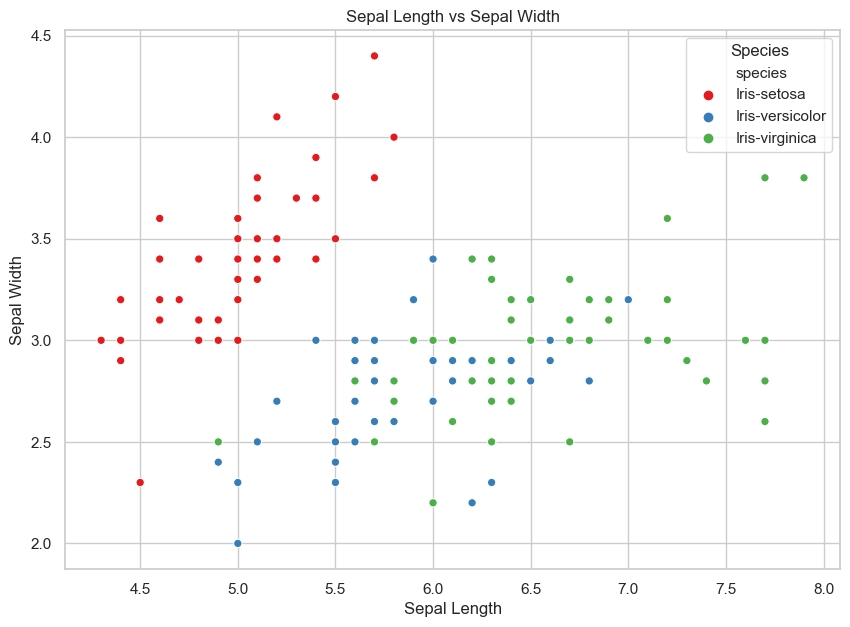

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='species', palette='Set1')

# Set labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

# Show the plot
plt.legend(title='Species')
plt.show()


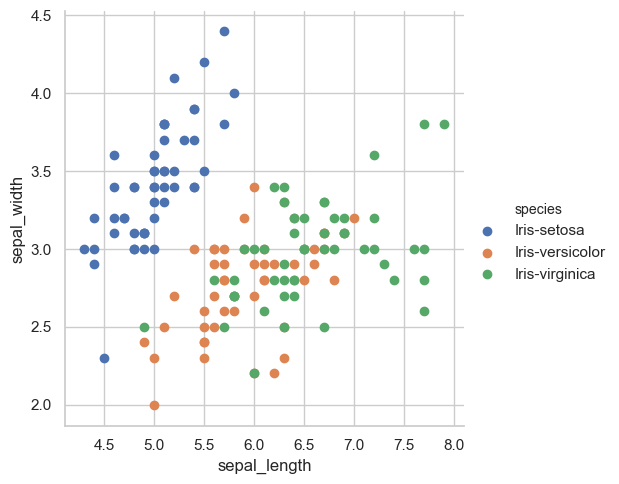

In [9]:
# Create FacetGrid
g = sns.FacetGrid(iris_df, hue='species', height=5)

# Map scatter plot
g.map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

# Show plot
plt.show()

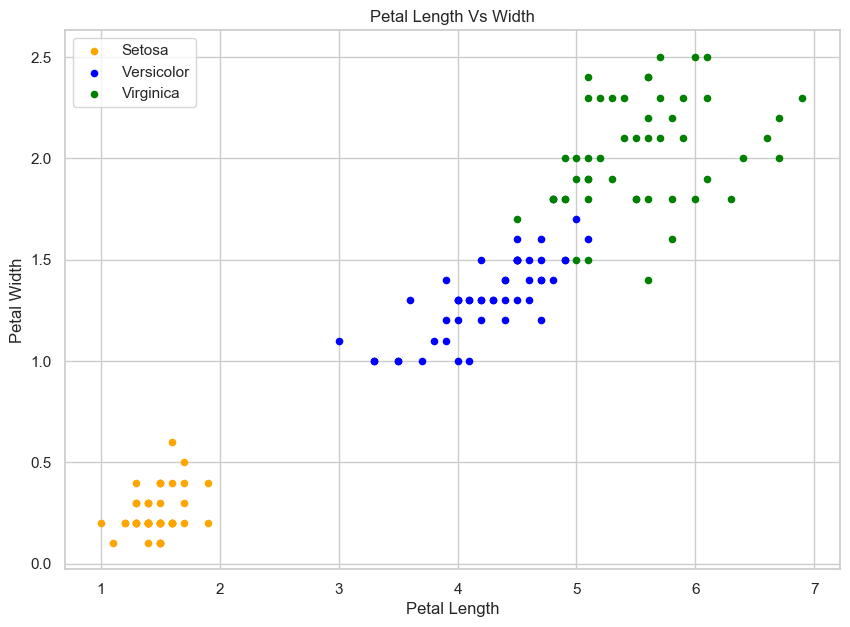

In [10]:
# Create scatter plot
fig = iris_df[iris_df.species == 'Iris-setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='orange', label='Setosa')
iris_df[iris_df.species == 'Iris-versicolor'].plot(kind='scatter', x='petal_length', y='petal_width', color='blue', label='Versicolor', ax=fig)
iris_df[iris_df.species == 'Iris-virginica'].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='Virginica', ax=fig)

# Set labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length Vs Width')

# Set figure size
fig = plt.gcf()
fig.set_size_inches(10, 7)

# Show the plot
plt.show()


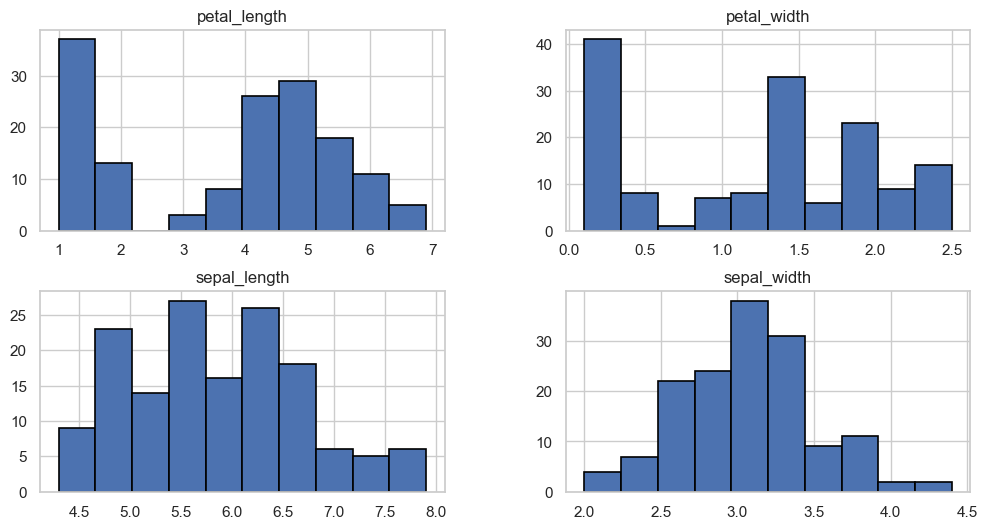

In [11]:
# Plot histograms
iris_df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12, 6)

# Show the plot
plt.show()

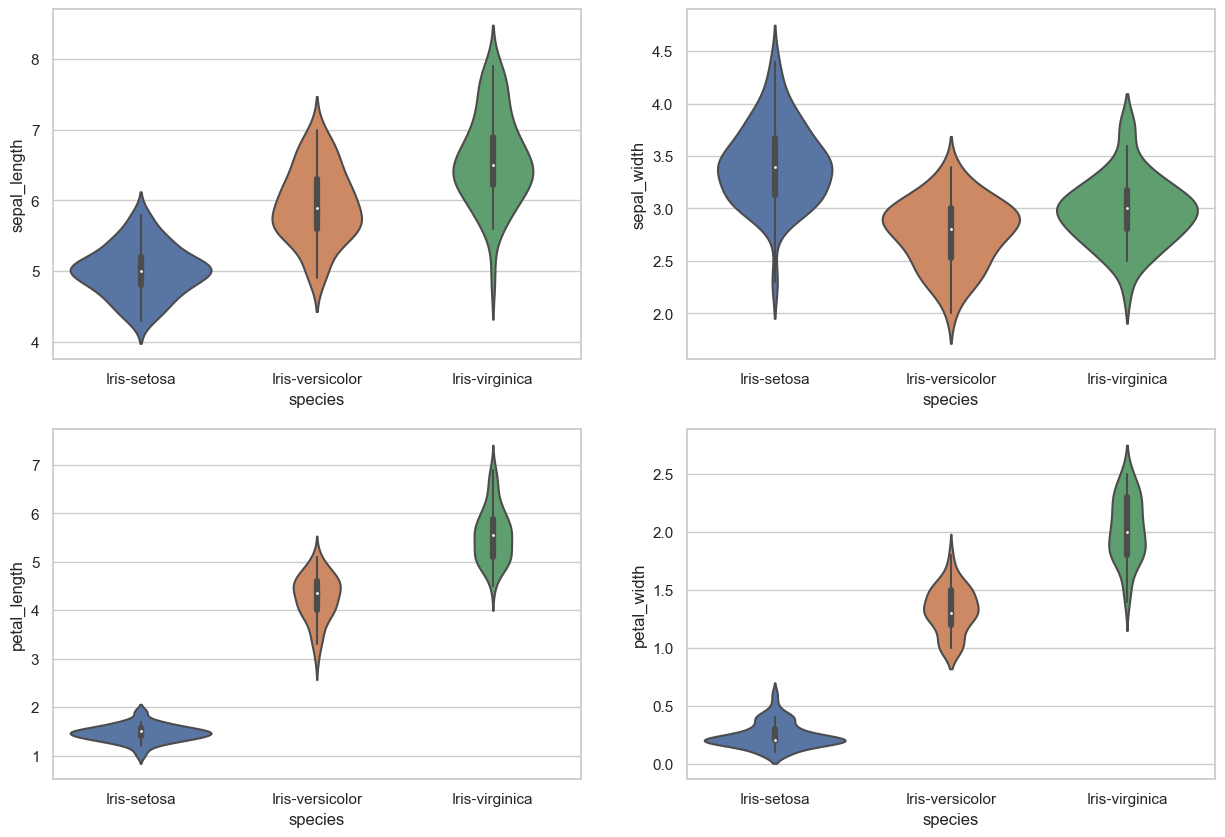

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=iris_df)

plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=iris_df)

plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=iris_df)

plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=iris_df)

plt.show()

In [13]:
iris_df.shape

(150, 5)

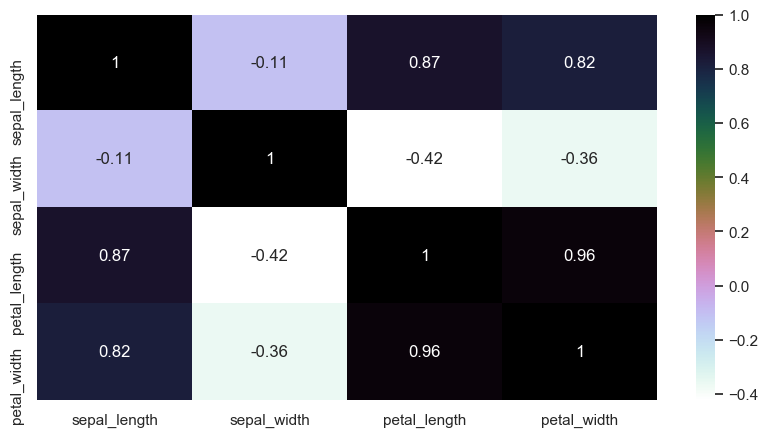

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(iris_df.corr(), 
            annot=True,
           cmap='cubehelix_r')
plt.show()

In [15]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

# Step 1: Load data and create DataFrame
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df
df = load_data('iris_modified.csv')
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

def extract_session_info(data):
    session_info = data.get("design_state_data", {}).get("session_info", {})
    project_id = session_info.get("project_id")
    experiment_id = session_info.get("experiment_id")
    dataset = session_info.get("dataset")
    session_name = session_info.get("session_name")
    session_description = session_info.get("session_description")
    return project_id, experiment_id, dataset, session_name, session_description

def extract_training_config(data):
    train_config = data.get("design_state_data", {}).get("train", {})
    policy = train_config.get("policy")
    time_variable = train_config.get("time_variable")
    sampling_method = train_config.get("sampling_method")
    split = train_config.get("split")
    k_fold = train_config.get("k_fold")
    train_ratio = train_config.get("train_ratio")
    random_seed = train_config.get("random_seed")
    return policy, time_variable, sampling_method, split, k_fold, train_ratio, random_seed

def extract_feature_handling(data):
    feature_handling = data.get("design_state_data", {}).get("feature_handling", {})
    for feature, details in feature_handling.items():
        feature_name = details.get("feature_name")
        is_selected = details.get("is_selected")
        feature_variable_type = details.get("feature_variable_type")
        feature_details = details.get("feature_details", {})
        numerical_handling = feature_details.get("numerical_handling")
        rescaling = feature_details.get("rescaling")
        make_derived_feats = feature_details.get("make_derived_feats")
        missing_values = feature_details.get("missing_values")
        impute_with = feature_details.get("impute_with")
        print("\nFeature Handling -", feature_name)
        print("Is Selected:", is_selected)
        print("Feature Variable Type:", feature_variable_type)
        print("Numerical Handling:", numerical_handling)
        print("Rescaling:", rescaling)
        print("Make Derived Features:", make_derived_feats)
        print("Missing Values:", missing_values)
        print("Impute With:", impute_with)

def main():
    # Load JSON data
    json_file = "algoparams_from_ui1.json"
    with open(json_file, 'r') as file:
        data = json.load(file)
    
    # Extract session information
    project_id, experiment_id, dataset, session_name, session_description = extract_session_info(data)
    print("Session Information:")
    print("Project ID:", project_id)
    print("Experiment ID:", experiment_id)
    print("Dataset:", dataset)
    print("Session Name:", session_name)
    print("Session Description:", session_description)

    # Print problem information
    target_info = data.get("design_state_data", {}).get("target", {})
    prediction_type = target_info.get("prediction_type")
    target_variable = target_info.get("target")
    print("\nProblem Information:")
    print("Prediction Type:", prediction_type)
    print("Target Variable:", target_variable)

    # Extract and print training configuration
    policy, time_variable, sampling_method, split, k_fold, train_ratio, random_seed = extract_training_config(data)
    print("\nTraining Configuration:")
    print("Policy:", policy)
    print("Time Variable:", time_variable)
    print("Sampling Method:", sampling_method)
    print("Split:", split)
    print("K-Fold:", k_fold)
    print("Train Ratio:", train_ratio)
    print("Random Seed:", random_seed)

    # Extract and print feature handling information
    extract_feature_handling(data)

    # Load dataset
    dataframe = pd.read_csv(dataset)

    # Split data into training and validation sets
    X = dataframe.drop(columns=[target_variable])
    y = dataframe[target_variable]
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_ratio, random_state=random_seed)
    
    # Parse JSON to identify selected models and hyperparameters
    algorithms = data.get("design_state_data", {}).get("algorithms", {})
    selected_models = []
    hyperparameters = {}
    for model_name, model_info in algorithms.items():
        if model_info.get("is_selected", False):
            selected_models.append(model_name)
            hyperparameters[model_name] = {
                "model": model_info.get("model_name"),
                "params": model_info.get("params", {})  # Retrieve hyperparameters from JSON
            }

    # Build selected models and perform hyperparameter tuning
    for model_name in selected_models:
        print("\nBuilding and tuning model:", model_name)
        
        # Define the model
        if model_name == "RandomForestClassifier":
            model = RandomForestClassifier()
        elif model_name == "DecisionTreeClassifier":
            model = DecisionTreeClassifier()
        elif model_name == "SVM":
            model = SVC()
        elif model_name == "KNN":
            model = KNeighborsClassifier()
        elif model_name == "neural_network":
            model = MLPClassifier()
        else:
            print("Model not recognized:", model_name)
            continue
        
        # Define hyperparameters for GridSearchCV
        param_grid = hyperparameters[model_name]["params"]
        
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5)
        
        # Fit the model to training data
        grid_search.fit(X_train, y_train)
        
        print("Best parameters found:", grid_search.best_params_)
        print("Best score on validation set:", grid_search.best_score_)

if __name__ == "__main__":
    main()


Session Information:
Project ID: 1
Experiment ID: kkkk-11
Dataset: iris_modified.csv
Session Name: test
Session Description: test

Problem Information:
Prediction Type: Classification
Target Variable: species

Training Configuration:
Policy: Split the dataset
Time Variable: sepal_length
Sampling Method: No sampling(whole data)
Split: Randomly
K-Fold: False
Train Ratio: 0.8
Random Seed: 10

Feature Handling - sepal_length
Is Selected: True
Feature Variable Type: numerical
Numerical Handling: Keep as regular numerical feature
Rescaling: No rescaling
Make Derived Features: False
Missing Values: Impute
Impute With: Average of values

Feature Handling - sepal_width
Is Selected: True
Feature Variable Type: numerical
Numerical Handling: Keep as regular numerical feature
Rescaling: No rescaling
Make Derived Features: False
Missing Values: Impute
Impute With: Average of values

Feature Handling - petal_length
Is Selected: True
Feature Variable Type: numerical
Numerical Handling: Keep as regular

C:\Users\samruddhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\samruddhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\samruddhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\samruddhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\samruddhi\anaconda3\lib\sit

Best parameters found: {}
Best score on validation set: 0.975


C:\Users\samruddhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
